# Lab 10

Suppose you have a list of positions of possible clients of Uber in Lisbon (Passageiros.csv). How many cars could you use and where they could be positioned in order to reduce time? Use a cluster analysis appraoch to support the solution of this problem.

* import the libraries needed
* import dataset from Passageiros.csv file
* Verify imported data
* verify data types and convert into numeric if needed. Use for example, df['x']=pd.to_numeric(df['x'], errors='coerce')
* plot a scatter chart
* create a X dataframe including only numeric columns
* calculete WCSS using X dataframe:

    wcss = []

    for i in range(1, 11):

        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

        kmeans.fit(df)

        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)

    plt.title('Elbow Method')

    plt.xlabel('Number of clusters')

    plt.ylabel('WCSS')

    plt.show()

    plot a scatter chart showing centroids of the clusters estimated



In [1]:
# import pandas and sklearn

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#import excel file

df = pd.read_csv("Passageiros.csv")

In [3]:
#verify 5 lines of the features variables

df.head(5)

,X,Y,Name
0,-9.163874,38.711563,Passageiro 1
1,-9.199447,38.703342,Passageiro 2
2,-9.143752,38.729060,Passageiro 3
3,-9.150410,38.755656,Passageiro 4
4,-9.136334,38.758534,Passageiro 5


In [4]:
#verify data types

df.dtypes

X       float64
Y       float64
Name     object
dtype: object

In [5]:
#convert to numeric and if there is an error show "not a value"

df['Name']=pd.to_numeric(df['Name'], errors='coerce')

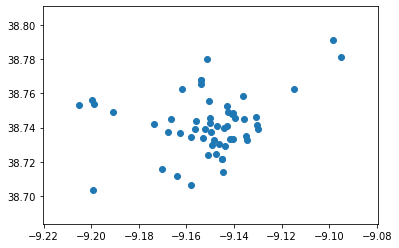

In [6]:
#plot a scatter chart

from sklearn.datasets.samples_generator import make_blobs

plt.scatter(df['X'], df['Y'])


In [7]:
#reate a X dataframe including only numeric columns

numerics = ["float","int"]
X = df.select_dtypes(include=numerics)

In [19]:
X
X['Name']=pd.to_numeric(X['Name'], errors='coerce')

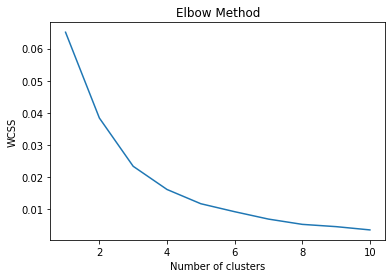

In [20]:
wcss = []

for i in range(1, 11):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

    
plt.plot(range(1, 11), wcss)

plt.title('Elbow Method')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

plt.show()

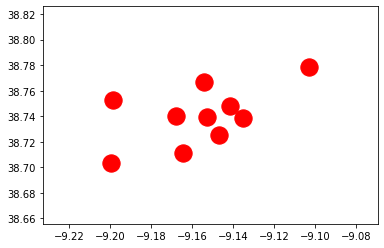

In [21]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
